# 计算所有超过两张脸以上的每个人的平均的向量的的矩

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import dlib
import os

import pandas as pd

In [2]:
facerec_model = "/Users/outianyi/Computer_Vision/dlib_face_recognition_resnet_model_v1.dat"
face_recognizer = dlib.face_recognition_model_v1(facerec_model)
model = '/Users/outianyi/Computer_Vision/shape_predictor_68_face_landmarks.dat'
predictor = dlib.shape_predictor(model)

In [3]:
# 所有超过两个以上图片的文件路径保存下来
def get_face_path(face_path):
    face_path_ovr2_list = []
    for dirpath, dirnames, filenames in os.walk(face_path):
        if len(filenames) >=2:
            face_path_ovr2_list.append(dirpath)
    return face_path_ovr2_list
face_path = '/Users/outianyi/Computer_Vision/lfw-deepfunneled'  # 这是所有人脸的名称
ovr_2faces_paths = get_face_path(face_path)
len(ovr_2faces_paths)

1680

In [6]:
import pandas as pd
# 保存中间结果
def save_temp_paths(ovr_2faces):
    df = pd.DataFrame(ovr_2faces)
    df.to_excel("Ovr_2faces_path.xlsx")
    return df

# df = save_temp_paths(ovr_2faces_paths)

In [25]:
# 到这里就直接从 excel 中读取了，减少计算量
ovr_2faces_list = pd.read_excel('Ovr_2faces_path.xlsx')
ovr_2faces_list.head(5)

,Unnamed: 0,0
0,0,/Users/outianyi/Computer_Vision/lfw-deepfunnel...
1,1,/Users/outianyi/Computer_Vision/lfw-deepfunnel...
2,2,/Users/outianyi/Computer_Vision/lfw-deepfunnel...
3,3,/Users/outianyi/Computer_Vision/lfw-deepfunnel...
4,4,/Users/outianyi/Computer_Vision/lfw-deepfunnel...


In [26]:
ovr_2faces_list.rename(columns={'Unnamed: 0': 'index', 0: 'path'}, inplace=True)
ovr_2faces_list
# 保存名称
# ovr_2faces_list['name'] =

,index,path
0,0,/Users/outianyi/Computer_Vision/lfw-deepfunnel...
1,1,/Users/outianyi/Computer_Vision/lfw-deepfunnel...
2,2,/Users/outianyi/Computer_Vision/lfw-deepfunnel...
3,3,/Users/outianyi/Computer_Vision/lfw-deepfunnel...
4,4,/Users/outianyi/Computer_Vision/lfw-deepfunnel...
...,...,...
1675,1675,/Users/outianyi/Computer_Vision/lfw-deepfunnel...
1676,1676,/Users/outianyi/Computer_Vision/lfw-deepfunnel...
1677,1677,/Users/outianyi/Computer_Vision/lfw-deepfunnel...
1678,1678,/Users/outianyi/Computer_Vision/lfw-deepfunnel...


## 计算人脸向量

In [53]:
test_faces = ovr_2faces_list[: 10]

In [64]:
# 找到最后一个 / 后的名称
# face = test_faces.iloc[9]
# face
paths = test_faces['path']
path_list = paths.to_list()
for path in path_list:
    name = path.split('/')[-1]


Paul_McNulty
Claudia_Pechstein
Ranil_Wickremasinghe
Mary-Kate_Olsen
Phil_Mickelson
Salma_Hayek
Jim_Edmonds
Martina_McBride
Jose_Theodore
Heidi_Fleiss


In [66]:
# 获取人名
get_name = lambda x: x.split('/')[-1]
ovr_2faces_list['name'] = ovr_2faces_list['path'].apply(get_name)
ovr_2faces_list

,index,path,name
0,0,/Users/outianyi/Computer_Vision/lfw-deepfunnel...,Paul_McNulty
1,1,/Users/outianyi/Computer_Vision/lfw-deepfunnel...,Claudia_Pechstein
2,2,/Users/outianyi/Computer_Vision/lfw-deepfunnel...,Ranil_Wickremasinghe
3,3,/Users/outianyi/Computer_Vision/lfw-deepfunnel...,Mary-Kate_Olsen
4,4,/Users/outianyi/Computer_Vision/lfw-deepfunnel...,Phil_Mickelson
...,...,...,...
1675,1675,/Users/outianyi/Computer_Vision/lfw-deepfunnel...,Tim_Duncan
1676,1676,/Users/outianyi/Computer_Vision/lfw-deepfunnel...,Enrique_Bolanos
1677,1677,/Users/outianyi/Computer_Vision/lfw-deepfunnel...,Gregory_Geoffroy
1678,1678,/Users/outianyi/Computer_Vision/lfw-deepfunnel...,Li_Zhaoxing


In [68]:
# 测试计算 人脸向量
test_list = ovr_2faces_list[: 10]


,index,path,name
0,0,/Users/outianyi/Computer_Vision/lfw-deepfunnel...,Paul_McNulty
1,1,/Users/outianyi/Computer_Vision/lfw-deepfunnel...,Claudia_Pechstein
2,2,/Users/outianyi/Computer_Vision/lfw-deepfunnel...,Ranil_Wickremasinghe
3,3,/Users/outianyi/Computer_Vision/lfw-deepfunnel...,Mary-Kate_Olsen
4,4,/Users/outianyi/Computer_Vision/lfw-deepfunnel...,Phil_Mickelson
5,5,/Users/outianyi/Computer_Vision/lfw-deepfunnel...,Salma_Hayek
6,6,/Users/outianyi/Computer_Vision/lfw-deepfunnel...,Jim_Edmonds
7,7,/Users/outianyi/Computer_Vision/lfw-deepfunnel...,Martina_McBride
8,8,/Users/outianyi/Computer_Vision/lfw-deepfunnel...,Jose_Theodore
9,9,/Users/outianyi/Computer_Vision/lfw-deepfunnel...,Heidi_Fleiss


In [90]:
def distance(a, b):
    # 计算两个 face 向量之间的欧式距离
    return np.sqrt(np.sum(np.square(np.array(a) - np.array(b))))
# 计算每个人脸的平均矩值
detector = dlib.get_frontal_face_detector()
def calc_average_moment(face_path):
    # 获取每张脸的文件路径，并获取脸部向量
    face_vectors = []
    for dirpath, dirnames, filenames in os.walk(face_path):
        for filename in filenames:
            # print(dirpath)
            # print(filename)
            t_path = os.path.join(dirpath, filename)
            # print(t_path)
            temp_img = cv2.imread(t_path)
            detec_face = detector(temp_img, 1)
            detec_face = detec_face[0]
            shape = predictor(temp_img, detec_face)
            descriptor = face_recognizer.compute_face_descriptor(temp_img, shape)
            # print(1)
            face_vectors.append(descriptor)
    # 计算各个向量之间的平均值
    face_distances = []
    for i in range(len(face_vectors)):
        for j in range(i, len(face_vectors)):
            face_distances.append(distance(face_vectors[i], face_vectors[j]))
    return np.average(face_distances)

In [91]:
test_list['average_moments'] = test_list['path'].apply(calc_average_moment)

/var/folders/r2/bv03lgdn7y58thlc1ntrzgvc0000gn/T/ipykernel_37343/1279102817.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_list['average_moments'] = test_list['path'].apply(calc_average_moment)


In [92]:
test_list

,index,path,name,average_moments
0,0,/Users/outianyi/Computer_Vision/lfw-deepfunnel...,Paul_McNulty,0.111720
1,1,/Users/outianyi/Computer_Vision/lfw-deepfunnel...,Claudia_Pechstein,0.417827
2,2,/Users/outianyi/Computer_Vision/lfw-deepfunnel...,Ranil_Wickremasinghe,0.278288
3,3,/Users/outianyi/Computer_Vision/lfw-deepfunnel...,Mary-Kate_Olsen,0.239453
4,4,/Users/outianyi/Computer_Vision/lfw-deepfunnel...,Phil_Mickelson,0.168326
5,5,/Users/outianyi/Computer_Vision/lfw-deepfunnel...,Salma_Hayek,0.418729
6,6,/Users/outianyi/Computer_Vision/lfw-deepfunnel...,Jim_Edmonds,0.173583
7,7,/Users/outianyi/Computer_Vision/lfw-deepfunnel...,Martina_McBride,0.347663
8,8,/Users/outianyi/Computer_Vision/lfw-deepfunnel...,Jose_Theodore,0.141682
9,9,/Users/outianyi/Computer_Vision/lfw-deepfunnel...,Heidi_Fleiss,0.324884


# 测试人脸的聚类

In [103]:
face_des = []
for path in test_list['path']:
    for faces_path in os.listdir(path):
        # print(os.path.join(path, faces_path))
        t_p = os.path.join(path, faces_path)
        img = cv2.imread(t_p)
        dt_face = detector(img, 1)
        dt_face = dt_face[0]
        shape = predictor(img, dt_face)
        descriptor = face_recognizer.compute_face_descriptor(img, shape)
        face_des.append(descriptor)
len(face_des)

41

In [112]:
# 测试聚类
labels = dlib.chinese_whispers_clustering(face_des, 0.70)
print('labels: {}'.format(labels))
num_classes = len(set(labels))
print('number of classes: {}'.format(num_classes))

labels: [0, 0, 1, 2, 3, 2, 3, 4, 4, 4, 5, 5, 5, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 1, 1, 1, 1, 1, 6, 6, 1, 1, 1, 1]
number of classes: 7


In [113]:
def calc_path_under_faces(path):
    return len(os.listdir(path))
test_list['num_faces'] = test_list['path'].apply(calc_path_under_faces)
test_list

/var/folders/r2/bv03lgdn7y58thlc1ntrzgvc0000gn/T/ipykernel_37343/4003547859.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_list['num_faces'] = test_list['path'].apply(calc_path_under_faces)


,index,path,name,average_moments,num_faces
0,0,/Users/outianyi/Computer_Vision/lfw-deepfunnel...,Paul_McNulty,0.111720,2
1,1,/Users/outianyi/Computer_Vision/lfw-deepfunnel...,Claudia_Pechstein,0.417827,5
2,2,/Users/outianyi/Computer_Vision/lfw-deepfunnel...,Ranil_Wickremasinghe,0.278288,3
3,3,/Users/outianyi/Computer_Vision/lfw-deepfunnel...,Mary-Kate_Olsen,0.239453,3
4,4,/Users/outianyi/Computer_Vision/lfw-deepfunnel...,Phil_Mickelson,0.168326,2
5,5,/Users/outianyi/Computer_Vision/lfw-deepfunnel...,Salma_Hayek,0.418729,13
6,6,/Users/outianyi/Computer_Vision/lfw-deepfunnel...,Jim_Edmonds,0.173583,2
7,7,/Users/outianyi/Computer_Vision/lfw-deepfunnel...,Martina_McBride,0.347663,5
8,8,/Users/outianyi/Computer_Vision/lfw-deepfunnel...,Jose_Theodore,0.141682,2
9,9,/Users/outianyi/Computer_Vision/lfw-deepfunnel...,Heidi_Fleiss,0.324884,4


# 将每个文件夹下每个人脸的特征向量都给保存了

In [114]:
def get_face_descriptors(path):
    descriptors = []
    for face_path in os.listdir(path):
        t_p = os.path.join(path, face_path)
        img = cv2.imread(t_p, cv2.IMREAD_COLOR)
        face_des = detector(img, 1)
        face_des = face_des[0]
        shape = predictor(img, dt_face)
        descriptor = face_recognizer.compute_face_descriptor(img, shape)
        descriptors.append(descriptor)
    return descriptors
test_list['descriptors'] = test_list['path'].apply(get_face_descriptors)

/var/folders/r2/bv03lgdn7y58thlc1ntrzgvc0000gn/T/ipykernel_37343/4226886098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_list['descriptors'] = test_list['path'].apply(get_face_descriptors)


In [115]:
test_list

,index,path,name,average_moments,num_faces,descriptors
0,0,/Users/outianyi/Computer_Vision/lfw-deepfunnel...,Paul_McNulty,0.111720,2,"[[-0.07060801982879639, 0.055325791239738464, ..."
1,1,/Users/outianyi/Computer_Vision/lfw-deepfunnel...,Claudia_Pechstein,0.417827,5,"[[-0.12119658291339874, 0.05247082561254501, 0..."
2,2,/Users/outianyi/Computer_Vision/lfw-deepfunnel...,Ranil_Wickremasinghe,0.278288,3,"[[-0.13655447959899902, 0.08730633556842804, 0..."
3,3,/Users/outianyi/Computer_Vision/lfw-deepfunnel...,Mary-Kate_Olsen,0.239453,3,"[[-0.09991657733917236, 0.10120007395744324, 0..."
4,4,/Users/outianyi/Computer_Vision/lfw-deepfunnel...,Phil_Mickelson,0.168326,2,"[[-0.1025066077709198, 0.05376621335744858, 0...."
5,5,/Users/outianyi/Computer_Vision/lfw-deepfunnel...,Salma_Hayek,0.418729,13,"[[-0.15633054077625275, 0.09237279742956161, 0..."
6,6,/Users/outianyi/Computer_Vision/lfw-deepfunnel...,Jim_Edmonds,0.173583,2,"[[-0.08292166888713837, 0.07434344291687012, 0..."
7,7,/Users/outianyi/Computer_Vision/lfw-deepfunnel...,Martina_McBride,0.347663,5,"[[-0.14516302943229675, 0.03735875338315964, 0..."
8,8,/Users/outianyi/Computer_Vision/lfw-deepfunnel...,Jose_Theodore,0.141682,2,"[[-0.11778141558170319, 0.1408040076494217, 0...."
9,9,/Users/outianyi/Computer_Vision/lfw-deepfunnel...,Heidi_Fleiss,0.324884,4,"[[-0.05440336465835571, 0.11301366984844208, 0..."


In [116]:
len(test_list['descriptors'].iloc[0])

2

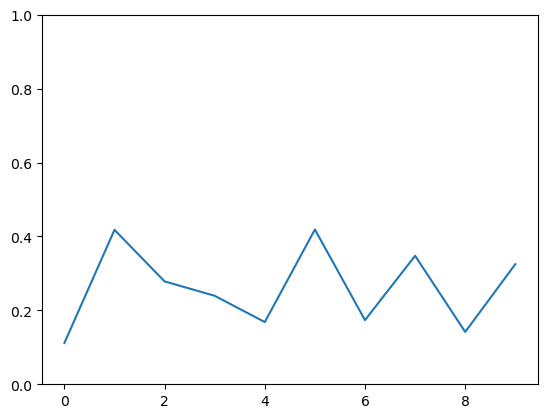

In [126]:
# 看一下这么多人脸的平均矩
test_list['average_moments'].describe()
plt.plot(test_list['average_moments'])
plt.ylim(0, 1)
plt.show()

In [127]:
readed_csv = pd.read_csv('multi_threding_results.csv')
len(readed_csv)

1680

In [128]:
readed_csv.head(20)

,Unnamed: 0,index,path,name,average moments,descriptors
0,0,0,/Users/outianyi/Computer_Vision/lfw-deepfunnel...,Paul_McNulty,0.112463,"[dlib.vector([-0.070608, 0.0553258, -0.0192305..."
1,1,1,/Users/outianyi/Computer_Vision/lfw-deepfunnel...,Claudia_Pechstein,0.420185,"[dlib.vector([-0.125048, 0.0517718, 0.033699, ..."
2,2,2,/Users/outianyi/Computer_Vision/lfw-deepfunnel...,Ranil_Wickremasinghe,0.296865,"[dlib.vector([-0.171162, 0.111649, 0.0194749, ..."
3,3,3,/Users/outianyi/Computer_Vision/lfw-deepfunnel...,Mary-Kate_Olsen,0.238884,"[dlib.vector([-0.103438, 0.103933, 0.117124, -..."
4,4,4,/Users/outianyi/Computer_Vision/lfw-deepfunnel...,Phil_Mickelson,0.172778,"[dlib.vector([-0.0900885, 0.0579769, 0.0159981..."
5,5,5,/Users/outianyi/Computer_Vision/lfw-deepfunnel...,Salma_Hayek,0.417727,"[dlib.vector([-0.154598, 0.0931335, 0.160469, ..."
6,6,6,/Users/outianyi/Computer_Vision/lfw-deepfunnel...,Jim_Edmonds,0.173937,"[dlib.vector([-0.0934584, 0.0560228, 0.135017,..."
7,7,7,/Users/outianyi/Computer_Vision/lfw-deepfunnel...,Martina_McBride,0.349136,"[dlib.vector([-0.146055, 0.0379049, 0.1829, -0..."
8,8,8,/Users/outianyi/Computer_Vision/lfw-deepfunnel...,Jose_Theodore,0.142142,"[dlib.vector([-0.119901, 0.144393, 0.0704998, ..."
9,9,9,/Users/outianyi/Computer_Vision/lfw-deepfunnel...,Heidi_Fleiss,0.325152,"[dlib.vector([-0.0491964, 0.110625, 0.106883, ..."


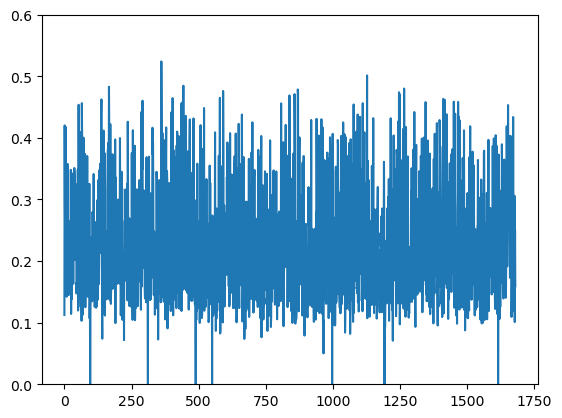

In [130]:
plt.plot(readed_csv['average moments'])
plt.ylim(0, 0.6)
plt.show()

In [133]:
all_average_moments = readed_csv['average moments']
all_average_moments.mean()

0.22634141520975465

In [134]:
all_average_moments.describe()

count    1680.000000
mean        0.226341
std         0.096147
min         0.000000
25%         0.148071
50%         0.202958
75%         0.296253
max         0.524050
Name: average moments, dtype: float64